In [32]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_excel('/home/x/桌面/chapter4/chapter4/demo/data/normalization_data.xls',header=None)

In [11]:
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [12]:
(data-data.min())/(data.max()-data.min())#数据最小最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [30]:
(data-data.mean())/data.std()#零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [33]:
data/10**np.ceil(np.log10(data.abs().max()))#小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


In [199]:
data1=pd.read_excel('/home/x/桌面/chapter4/chapter4/demo/data/discretization_data.xls')

In [200]:
data1=data1['肝气郁结证型系数'].copy()

In [201]:
k=4
d1=pd.cut(data1,k,labels=range(k))#等宽离散化，各个类依次命名为0123

In [202]:
w=[1.0*i/k for i in range(k+1)]
w

[0.0, 0.25, 0.5, 0.75, 1.0]

In [203]:
w=data1.describe(percentiles=w)[4:4+k+1]

In [204]:
w[0]=w[0]*(1-1e-10)
w

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [205]:
d2=pd.cut(data1,w,labels=range(k))

In [206]:
from sklearn.cluster import KMeans#引入KMeans

In [207]:
kmodel=KMeans(n_clusters=k,n_jobs=2)#建立模型，n_jobs是并行数
kmodel

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [209]:
kmodel.fit(data1.reshape((len(data1),1)));#训练模型
kmodel

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [210]:
c=pd.DataFrame(kmodel.cluster_centers_).sort(0)

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [213]:
w=pd.rolling_mean(c,2).iloc[1:]#相邻两项求中点,作为边界

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()
  if __name__ == '__main__':


In [214]:
w=[0]+list(w[0])+[data1.max()]#把首末边界点加上
w

[0, 0.17869758895131088, 0.25772406433683875, 0.35184318136037063, 0.504]

In [215]:
d3=pd.cut(data1,w,labels=range(k))

In [185]:
def cluster_plot(d,k):#自定义作图显示聚类结果
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签，然并暖
    plt.rcParams['axes.unicode_minus']=False
    
    plt.figure(figsize=(8,3))
    for j in range(0,k):
        plt.plot(data1[d==j],[j for i in d[d==j]],'o')
        
    plt.ylim(-0.5,k-0.5)
    return plt

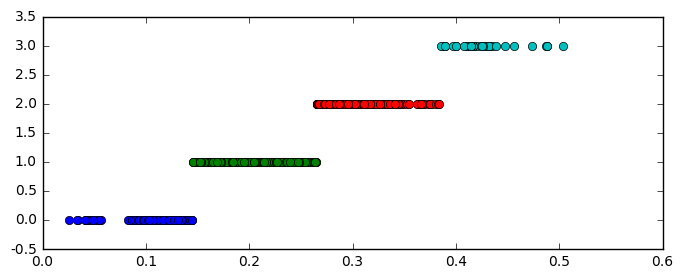

In [211]:
cluster_plot(d1,k).show()

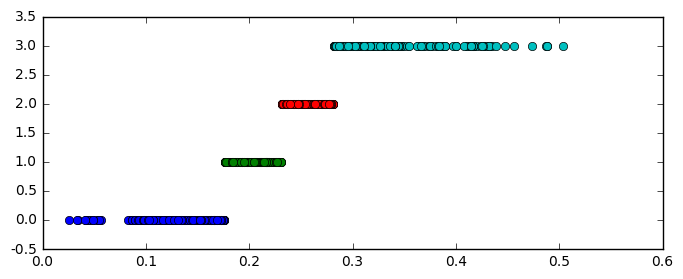

In [212]:
cluster_plot(d2,k).show()

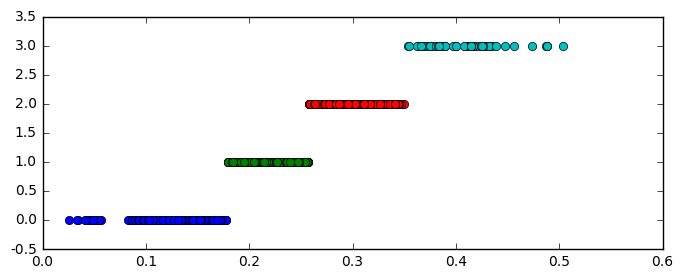

In [216]:
cluster_plot(d3,k).show()

In [189]:
d2

0      0
1      1
2      0
3      1
4      0
5      1
6      0
7      1
8      1
9      0
10     1
11     0
12     1
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     1
28     1
29     1
      ..
900    1
901    0
902    0
903    0
904    0
905    1
906    0
907    0
908    1
909    1
910    1
911    0
912    0
913    0
914    0
915    1
916    0
917    0
918    0
919    0
920    1
921    0
922    0
923    0
924    1
925    1
926    0
927    1
928    1
929    0
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]